# Introduction

## I. Purpose and Background

The purpose of this project is to explore a phenomenon known as the "wisdom of the crowds." Previous research has shown that aggregating non-expert opinions into a collective estimate can produce highly accurate results [1]. One of the most famous examples of this came from statistician Sir Francis Galton. In 1907, Galton asked 787 villagers to guess the weight of an ox at a fair. No one at the fair guessed the correct answer, which was 1197 pounds. But when Galton averaged all of their guesses, the result was 1198 pounds, almost exactly correct [2,3].

The podcast Planet Money recently tried recreating this experiment. They went to a county fair in New Jersey and took pictures of host Jacob Goldstein, who weighed 165 pounds, standing next to a cow, which weighed 1355 pounds, and asked people at the fair and online to guess how much the cow weighed. They ended up receiving 17205 guesses that averaged out to 1287 pounds, which was only about 5% lower than the actual weight. They also asked people who guessed if they were "experts" (i.e., had they ever worked with cows). Interestingly, the average of the "expert" guesses was 1272 pounds, which was a bit worse than the overall crowd [3].

In the Planet Money episode, they interviewed James Surowiecki, a journalist who wrote a book called "The Wisdom of Crowds: Why the Many Are Smarter Than the Few and How Collective Wisdom Shapes Business, Economies, Societies and Nations". He explained that this works because each person is thinking about the problem slightly differently, and each person's guess is contributing some new piece of information. And while each person's guess will introduce some error, these errors tend to cancel out [3]. Another way to look at this would be to invoke the law of large numbers--if individual estimation errors are unbiased and center at the true value, then the average of individual estimations will tend to converge to the true value as the number of individual estimations increases [1].

However, individual estimation errors are not always unbiased or centered at the true value. In the Planet Money episode, Surowiecki explained a phenomenon from behavioral economics called information cascade, where people who are connected by a network influence each other's decisions and behavior and make the same decisions in a sequential fashion [4]. Some examples of this would be stock market panics or bubbles [3]. In their paper "Counteracting estimation bias and social influence to improve the wisdom of crowds," Kao et al. explained that, in addition to error arising from information sharing among individuals, there are also a variety of cognitive and perceptual biases that can influence individual guesses. For example, individuals might systematically overestimate or underestimate due to phenomena such as Stevens' power law, where there is a nonlinear relationship between the subjective perception and actual magnitude of a physical stimulus [1]. Another example is Fechner's law, which states that subjective sensation of a stimulus is proportional to the logarithm of the stimulus intensity [5], implying that lognormal, rather than normal, distributions of estimations are common [1]. Other research studies have shown a tendency for people to underestimate true values in numerosity estimation tasks [6-8].

In the Planet Money episode, host David Kestenbaum offhandedly mentioned estimating the number of jelly beans in a jar as another version of a "wisdom of the crowds" experiment [3]. That is the direct inspiration for this project. The following experiment looks at several questions:

1. How well does the mean or median of a crowd's guesses estimate the number of jelly beans in a glass vase?
2. Do people who are more confident in their guesses estimate the number of jelly beans differently than people who are less confident?

# II. Data and Methods

## 1. Data

To set up this experiment, 1534 jelly beans were placed in a glass vase. Several pictures of the vase were taken from different angles. These pictures were then compiled with [this survey](https://forms.gle/g2E8YpA53uSoiXcv9). The survey asks respondents to guess the number of jelly beans in the vase, estimate how many minutes they spent thinking before deciding on their guess, and rating their confidence level in their guess on a scale of 1 to 5, with 1 being not confident at all and 5 being completely confident. The last two questions were designed to measure how "expert" someone's guess was. While there likely aren't many jelly bean estimation experts out in the world, the time spent thinking and the person's subjective confidence level might help identify "expert" guesses. To reduce the chances of non-honest or repeat guesses, Google login was required in order to answer the survey.

The survey was posted on the r/SampleSize subreddit on reddit.com and on Facebook, where it gathered 126 responses. The resulting data contains four columns:

* <b>Timestamp:</b> The date and time that a respondent answered the survey.
* <b>How many jelly beans are in the vase?:</b> The respondent's guess of how many jelly beans are in the vase.
* <b>To the nearest minute, how many minutes do you estimate you spent thinking before you decided on your guess?:</b> The respondent's estimation of how long they spent thinking before deciding on their guess.
* <b>On a scale of 1 to 5, with 1 being not confident at all and 5 being completely confident, how confident are you in your guess?:</b> The respondent's rating of their confidence level in their guess.

This is very likely not a representative sample of the population as a whole, and there is no way to validate if a respondent made an honest effort to answer the survey, or tried to answer more than once. These are both significant limitations of the experiment that must be acknowledged. However, due to resource constraints, this was realistically the best method available to collect responses.

## 2. Methods

The data was cleaned and explored in a separate [cleaning_eda file](https://github.com/tommcd09/jellybeans/blob/main/cleaning_eda.ipynb). That analysis found a generally lognormal distribution of guesses, as well as some extreme outliers and significant differences between the medians and means in the data. Therefore, instead of performing traditional hypothesis tests, this analysis uses bootstrap statistics to perform hypothesis tests on both the means and medians of the data. While traditional hypothesis tests estimate sampling distributions using test statistics and a number of assumptions, bootstrapping estimates sampling distributions by resampling the data a large number of times with replacement and then computing the test statistic of interest on each resampled set of data [9-10]. Bootstrapping doesn't require the same test statistics and assumptions as traditional hypothesis testing [10].

Generally, hypothesis tests compare the observed value $\hat{τ}$ of a test statistic $τ$ with the distribution of that test statistic if the null hypothesis were true. The null hypothesis is rejected if the observed value $\hat{τ}$ is sufficiently extreme compared to the null distribution for the chosen significance level $α$. When performing a hypothesis test at significance level $α$ that rejects the null hypothesis when $\hatτ$ is in the upper tail of the null distribution, the p-value of $\hat{τ}$ is $p(\hat{τ}) = 1 − F(\hat{τ})$, where $F(τ)$ is the cumulative distribution function of $τ$ under the null hypothesis. In situations where $F(τ)$ is known, it is easy to simply calculate the p-value. However, in many situations $F(τ)$ is not known [9].

One way to estimate $F$ is by using bootstrapping. Bootstrapping involves resampling the original data with replacement many times to create simulated bootstrap datasets, indexed by $j$, with the same size as the original dataset. Each bootstrap dataset is then used to compute the bootstrap test statistic $τ^{*}_{j}$ (e.g., the mean or median). A critical step in this process is transforming the data such that the bootstrap samples satisfy the null hypothesis. The result is a null distribution that can be used to perform hypothesis tests. Under this process, the bootstrap p-value for the upper tail is: 

$$\hat{p}^{*}(\hat{τ}) = 1 - \hat{F}^{∗}(\hatτ) = \frac{1}{B}\sum \limits _{j=1} ^{B} I(τ^{*}_{j} > \hat{τ})$$

where $\hat{F}^{∗}$ is the empirical distribution function of $τ^{*}_{j}$, and $I(·)$ is the indicator function, which is equal to 1 when its argument is true and 0 otherwise. Another way to look at this is that the bootstrap p-value is just the proportion of bootstrap test statistics that are more extreme than the observed test statistic. The inequality in the indicator function is reversed when computing the p-value for the lower tail [9-10].

To perform a two-tailed bootstrap hypothesis test, we would need to use different formulas. If we can assume that $τ$ is symmetrically distributed around 0, then we can use the symmetric bootstrap p-value:

$$\hat{p}_{s}^{*}(\hat{τ}) = \frac{1}{B}\sum \limits _{j=1} ^{B} I(|τ^{*}_{j}| > |\hat{τ}|)$$

If we cannot assume a symmetric distribution of $τ$, then we use the equal-tail bootstrap p-value:

$$\hat{p}_{et}^{*}(\hat{τ}) = 2 * min(\frac{1}{B}\sum \limits _{j=1} ^{B} I(τ^{*}_{j} \leq \hat{τ}), \frac{1}{B}\sum \limits _{j=1} ^{B} I(τ^{*}_{j} > \hat{τ}))$$

This is just taking the lesser of the upper and lower tail p-values and multiplying it by 2 [9].

# III. Analysis and Results

## 1. How well does the mean or median of a crowd's guesses estimate the number of jelly beans in a glass vase?

The first question for analysis is how well the crowd has actually estimated the number of jelly beans in the vase. The 2 most obvious measures of the crowd's collective estimate are the mean and median of the crowd's guesses. Looking at the mean, we test the following hypotheses:

$$H_{0}: μ = 1534$$

$$H_{a}: μ \neq 1534$$

$H_{0}$ is the null hypothesis that the mean population estimate $μ$ for the number of jelly beans in the jar is 1534, while $H_{a}$ is the alternative hypothesis that the mean population estimate is a number other than 1534.

Looking at the median, we test the following hypotheses:

$$H_{0}: m = 1534$$

$$H_{a}: m \neq 1534$$

$H_{0}$ is the null hypothesis that the median population estimate $m$ for the number of jelly beans in the jar is 1534, while $H_{a}$ is the alternative hypothesis that the median population estimate is a number other than 1534.

To test these hypotheses, we will use two-tailed bootstrap hypothesis tests at significance level $α = 5\%$.

### 1(a). Testing the mean

First, we import the necessary Python packages and load the data into a pandas DataFrame.

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import data
jellybeans = pd.read_csv('./data/jelly_beans_clean.csv', skipinitialspace = True)

#Take a look at the data
jellybeans

,Timestamp,guess,time_spent_guessing,confidence_level,log_guess,confident
0,4/18/22 23:29,12,0,5,2.484907,More Confident
1,4/18/22 17:45,17,1,5,2.833213,More Confident
2,4/18/22 21:24,20,0,1,2.995732,Less Confident
3,4/18/22 17:35,100,1,2,4.605170,Less Confident
4,4/18/22 20:46,128,1,1,4.852030,Less Confident
...,...,...,...,...,...,...
121,4/19/22 16:10,5000,2,3,8.517193,More Confident
122,4/18/22 16:44,8325,0,3,9.027018,More Confident
123,4/19/22 5:00,10369,17,4,9.246576,More Confident
124,4/18/22 18:48,15300,5,2,9.635608,Less Confident


Next, we define a function "bs_replicates" that will resample the data n times with replacement and use function "func" to compute bootstrap test statistics for each resampled dataset.

In [2]:
def bs_replicates(data, func, n=1, seed=0):
    """Resample data n times with replacement and use func to compute bootstrap test statistics."""
    np.random.seed(seed)
    bs_replicates = [func(np.random.choice(data, len(data))) for i in range(n)]
    return bs_replicates

We assign the values of the "guess" column to a numpy array and shift the guesses such that the distribution of guesses still has the same shape but now has a mean centered over the actual number of jelly beans (1534) rather than the observed mean of guesses (1538). This makes it so that the guess data now satisfies the null hypothesis.

In [3]:
#Assign "guess" values to numpy array
guesses = np.array(jellybeans['guess'])

#Assign actual number and observed mean to variables
actual_number = 1534
observed_mean = np.mean(guesses)

#Shift guesses so that they now have mean 1534
guesses_mean_shifted = guesses - observed_mean + actual_number

#Print mean of shifted data
np.mean(guesses_mean_shifted)

1533.9999999999998

Now, we run the "bs_replicates" function on the shifted guess data and generate a distribution of bootstrap means. We plot this distribution with a dashed line representing the observed mean guess and a gray background representing the 95% confidence interval of the distribution of bootstrap means.

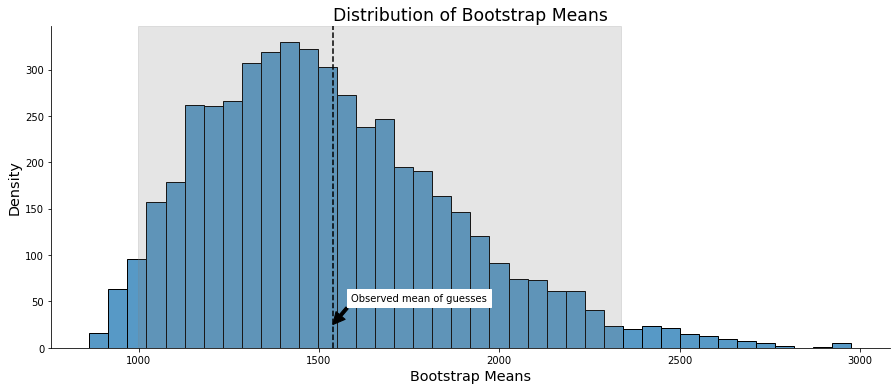

In [4]:
#Run "bs_replicates" on shifted guess data
reps_mean_shifted = bs_replicates(guesses_mean_shifted, np.mean, n=5000)

#Compute 95% confidence interval of bootstrap means
lower, upper = np.percentile(reps_mean_shifted, [2.5, 97.5])

#Plot bootstrap means in a histogram
sns.displot(reps_mean_shifted, kind = 'hist', height = 5, aspect = 2.5)

#Label axes
plt.xlabel('Bootstrap Means', fontsize = 'x-large')
plt.ylabel('Density', fontsize = 'x-large')

#Label title
plt.title('Distribution of Bootstrap Means', fontsize = 'xx-large')

#Mark 95% confidence interval in gray
plt.axvspan(lower, upper, color='grey', alpha=0.2)

#Add dashed line for observed mean of guesses, with annotation and arrow
plt.axvline(x = observed_mean, linestyle = '--', color = 'black')
plt.annotate('Observed mean of guesses', xy=(observed_mean, 25), xytext=(observed_mean + 50, 50), 
             arrowprops={'facecolor':'black', 'width': 3}, backgroundcolor = 'white')
plt.show()

The observed mean of guesses is well within the 95% confidence interval, so we would expect the p-value to be greater than 0.05 and that we would not be able to reject the null hypothesis. We also see that the distribution of bootstrap means is not symmetrical, so we compute the equal-tail bootstrap p-value to perform the hypothesis test.

In [5]:
#Compute and print p-value
p = 2 * np.minimum(np.sum(reps_mean_shifted <= observed_mean)/5000, 
                   np.sum(reps_mean_shifted > observed_mean)/5000)
print('p-value =', p)

p-value = 0.8744


The p-value is about 0.87, well above 0.05, so we fail to reject the null hypothesis that $μ = 1534$. However, it doesn't necessarily follow that the null hypothesis is actually true. Let's look at the unshifted 95% confidence interval of the mean of guesses:

In [6]:
#Run "bs_replicates" on original unshifted guess data
reps_mean = bs_replicates(guesses, np.mean, n=5000)

#Compute 95% confidence interval of bootstrap means
lower, upper = np.percentile(reps_mean, [2.5, 97.5])

#Print confidence interval
print(lower, upper)

1003.996626984127 2341.0337301587297


This is a very large interval relative to the actual number of jelly beans in the jar. Saying that we are confident that the true mean of guesses will be between about 1004 and 2341 95% of the time doesn't tell us very much about whether the true mean of guesses is actually close to 1534. This indicates a large amount of sampling error, likely due to the large variation in guesses caused by extreme outliers in the data [11]. The median, on the other hand, is relatively robust to outliers, so performing a hypothesis test on the median may yield more useful results.

### 1(b). Testing the median

As before with the mean, we shift the guesses such that the distribution of guesses still has the same shape but now has a median centered over the actual number of jelly beans (1534) rather than the observed median of guesses (750). 

In [7]:
#Assign observed median to variable
observed_median = np.median(guesses)

#Shift guesses so that they now have median 1534
guesses_median_shifted = guesses - observed_median + actual_number

#Print median of shifted data
np.median(guesses_median_shifted)

1534.0

We then run the "bs_replicates" function on the shifted guess data and generate a distribution of bootstrap medians. We plot this distribution with a dashed line representing the observed median guess and a gray background representing the 95% confidence interval of the distribution of bootstrap medians.

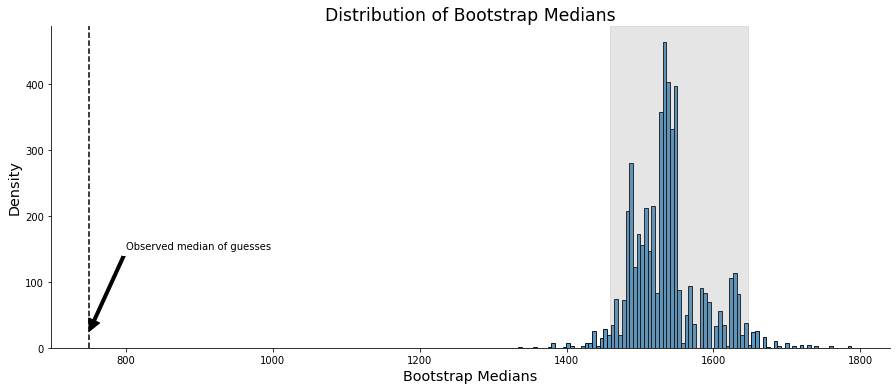

In [8]:
#Run "bs_replicates" on shifted guess data
reps_median_shifted = bs_replicates(guesses_median_shifted, np.median, n=5000)

#Compute 95% confidence interval of bootstrap medians
lower, upper = np.percentile(reps_median_shifted, [2.5, 97.5])

#Plot bootstrap medians in a histogram
sns.displot(reps_median_shifted, kind = 'hist', height = 5, aspect = 2.5)

#Label axes
plt.xlabel('Bootstrap Medians', fontsize = 'x-large')
plt.ylabel('Density', fontsize = 'x-large')

#Label title
plt.title('Distribution of Bootstrap Medians', fontsize = 'xx-large')

#Mark 95% confidence interval in gray
plt.axvspan(lower, upper, color='grey', alpha=0.2)

#Add dashed line for observed median of guesses, with annotation and arrow
plt.axvline(x = observed_median, linestyle = '--', color = 'black')
plt.annotate('Observed median of guesses', xy=(observed_median, 25), xytext=(observed_median + 50, 150), 
             arrowprops={'facecolor':'black', 'width': 3}, backgroundcolor = 'white')
plt.show()

This is a radically different picture than before. The observed median of guesses is well outside the 95% confidence interval of the shifted data, so we would expect the p-value to be less than 0.05 and that we would reject the null hypothesis. As before, the distribution of bootstrap medians is not symmetrical, so we compute the equal-tail bootstrap p-value to perform the hypothesis test.

In [9]:
#Compute and print p-value
p = 2 * np.minimum(np.sum(reps_median_shifted <= observed_median)/5000, 
                   np.sum(reps_median_shifted > observed_median)/5000)
print('p-value =', p)

p-value = 0.0


The p-value is 0, well below 0.05, so we reject the null hypothesis that $m = 1534$. Moreover, the confidence interval for the median is much tighter than it was for the mean. 

### 1(c). Discussion

The hypothesis tests for the mean and the median yielded drastically different results. If we choose to believe the results of the mean test, then we might conclude that the crowd actually did a great job in estimating the number of jelly beans in the jar. If we choose to believe this story, then the outliers in the data are actually an essential part of the collective wisdom of crowds, and their absence makes crowds less wise overall. However, this is a difficult story to believe. It is hard to believe that the extreme outliers in the data that were identified in the [cleaning_eda file](https://github.com/tommcd09/jellybeans/blob/main/cleaning_eda.ipynb) were honest guesses. And if they were not in fact honest guesses, then their values are arbitrary aside from being very large or very small. The highest guess could have easily been 50000, or 400000, instead of 40000. Raising the top guess to 50000 would have shifted the mean to 1618, and raising the highest guess to 400000 would have shifted the mean to 4396, well above the correct number of 1534. Similarly, the lowest 8 guessers could have all guessed 1 and the resulting mean guess of 1532 would have actually been more accurate than the observed mean of 1538. These kinds of thought experiments with the data make it hard to believe that there is any wisdom in these kinds of extreme guesses.

If we choose to believe the results of the median test, then we might conclude that the majority of the crowd is actually underestimating the number of jelly beans in the vase by a large amount. This is consistent with prior research showing that humans tend to underestimate in numerosity estimation tasks [1,6-8]. The approximately lognormal distribution of guesses is also consistent with prior research. For example, Kao et al. had students estimate the number of objects in a jar for various numerosities, ranging from 54 to 27852. They found that estimates across all numerosities followed a lognormal distribution that varied predictably as the numerosity changed. Some of the possible individual estimation biases they identified for this systematic underestimation and lognormal distribution of estimates included Steven's law and Fechner's law, described further above in the introduction [1].

However, we could also choose to believe neither story. As mentioned earlier, the sample of Reddit and Facebook users who answered this survey are likely not representative of the population as a whole. And since we already suspect that many of the estimates at the extremes were not honest guesses, this also calls into question other estimates that were not at the extremes. Interestingly, Kao et al also found that mean of estimates in their study tended to systematically overestimate the correct number of objects, which this project did not find [1]. This indicates that perhaps our sample is not representative of the population, or at least that our sample has different characteristics than Kao's sample. That the sample is representative of the population of interest is a critical assumption for bootstrapping, so we would be right to be skeptical of the results if we don't believe that this assumption holds.

## 2. Do people who are more confident in their guesses estimate the number of jelly beans differently than people who are less confident?

The next question we turn to is whether people who are more confident in their guesses estimate the number of jelly beans differently than people who are less confident. The data contains 75 people who indicated they had a confidence level in their guess of 3 to 5 out of 5 and 51 people who indicated they had a confidence level in their guess of 1 to 2 out of 5. Looking at the means of these groups, we test the following hypotheses:

$$H_{0}: μ_{MC} = μ_{LC}$$

$$H_{a}: μ_{MC} \neq μ_{LC}$$

$H_{0}$ is the null hypothesis that the mean estimate $μ_{MC}$ of the "More Confident" group is the same as the mean estimate $μ_{LC}$ of the "Less Confident" group, while $H_{a}$ is the alternative hypothesis that the means are not equal.

Looking at the medians, we test the following hypotheses:

$$H_{0}: m_{MC} = m_{LC}$$

$$H_{a}: m_{MC} \neq m_{LC}$$

$H_{0}$ is the null hypothesis that the median estimate $m_{MC}$ of the "More Confident" group is the same as the median estimate $m_{LC}$ of the "Less Confident" group, while $H_{a}$ is the alternative hypothesis that the medians are not equal.

To test these hypotheses, we will once again use a two-tailed bootstrap hypothesis test at significance level $α = 95\%$.

### 2(a). Testing the difference in means

First, we break the guesses from the "More Confident" and "Less Confident" groups into separate numpy arrays.

In [10]:
confident = np.array(jellybeans[jellybeans['confident'] == 'More Confident']['guess'])
not_confident = np.array(jellybeans[jellybeans['confident'] == 'Less Confident']['guess'])

Next, we calculate the observed difference in means between the two groups and shift the guesses in each group such that the difference in means of the two groups 0 rather than the observed difference of 505.

In [11]:
#Calculate observed difference in means
observed_diff_means = np.mean(not_confident) - np.mean(confident) 

#Shift guesses so that they now have difference in means of 0
conf_shifted = confident - np.mean(confident) + observed_mean
notconf_shifted = not_confident - np.mean(not_confident) + observed_mean

np.mean(notconf_shifted) - np.mean(conf_shifted)

2.2737367544323206e-13

Now, we run the "bs_replicates" function on the shifted guess data and generate a distribution of bootstrap differences in means. We plot this distribution with a dashed line representing the observed difference in means and a gray background representing the 95% confidence interval of the distribution of bootstrap differences in means.

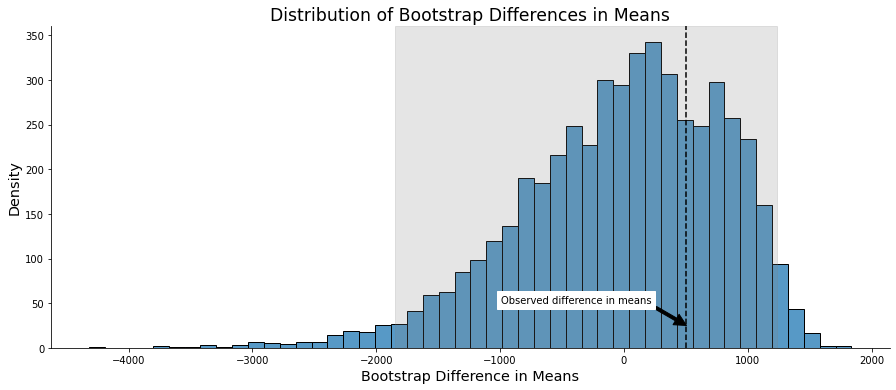

In [12]:
#Run "bs_replicates" on shifted guess data
reps_conf_shifted = np.array(bs_replicates(conf_shifted, np.mean, n=5000))
reps_notconf_shifted = np.array(bs_replicates(notconf_shifted, np.mean, n=5000))

#Calculate bootstrap differences in means
reps = reps_conf_shifted - reps_notconf_shifted

#Compute 95% confidence interval of bootstrap differences in means
lower, upper = np.percentile(reps, [2.5, 97.5])

#Plot bootstrap differences in means in a histogram
sns.displot(reps, kind = 'hist', height = 5, aspect = 2.5)

#Label axes
plt.xlabel('Bootstrap Difference in Means', fontsize = 'x-large')
plt.ylabel('Density', fontsize = 'x-large')

#Label title
plt.title('Distribution of Bootstrap Differences in Means', fontsize = 'xx-large')

#Mark 95% confidence interval in gray
plt.axvspan(lower, upper, color='grey', alpha=0.2)

#Add dashed line for observed difference in means, with annotation and arrow
plt.axvline(x = observed_diff_means, linestyle = '--', color = 'black')
plt.annotate('Observed difference in means', xy=(observed_diff_means, 25), xytext=(observed_diff_means - 1500, 50), 
             arrowprops={'facecolor':'black', 'width': 3}, backgroundcolor = 'white')
plt.show()

The observed difference in means is well within the 95% confidence interval, so we would expect the p-value to be greater than 0.05 and that we would not be able to reject the null hypothesis. We also see that the distribution of differences in bootstrap means is not symmetrical, so we compute the equal-tail bootstrap p-value to perform the hypothesis test.

In [13]:
#Compute and print p-value
p = 2 * np.minimum(np.sum(reps <= observed_diff_means)/len(reps), np.sum(reps > observed_diff_means)/len(reps))
print('p-value =', p)

p-value = 0.5812


The p-value is about 0.58, well above 0.05, so we fail to reject the null hypothesis that $μ_{MC} = μ_{LC}$. However, as with the confidence interval for the overall mean, the 95% confidence interval for the difference in means is quite large:

In [14]:
#Run "bs_replicates" on original unshifted guess data
reps_conf = np.array(bs_replicates(confident, np.mean, n=5000))
reps_notconf = np.array(bs_replicates(not_confident, np.mean, n=5000))

#Calculate bootstrap differences in means
reps = reps_conf - reps_notconf

#Compute 95% confidence interval of bootstrap differences in means
lower, upper = np.percentile(reps, [2.5, 97.5])

#Print confidence interval
print(lower, upper)

-2355.3972745098035 728.8798431372545


Again, this is a very large interval relative to the actual number of jelly beans in the jar, even larger than the confidence interval for the overall mean. There could in fact be a very large difference between how more confident and less confident guessers estimate the number of jelly beans, but we would not be able to detect it with this test. As before, the difference in medians might be a more trustworthy measure of the difference between more confident and less confident guessers.

### 2(b). Testing the difference in medians

First, we calculate the observed difference in medians between the two groups and shift the guesses in each group such that the difference in medians is 0 rather than the observed difference of 182.

In [15]:
#Calculate observed difference in medians
observed_diff_medians = np.median(confident) - np.median(not_confident)

#Shift guesses so that they now have difference in medians of 0
conf_shifted = confident - np.median(confident) + observed_median
notconf_shifted = not_confident - np.median(not_confident) + observed_median

np.median(conf_shifted) - np.median(notconf_shifted)

0.0

Now, we run the "bs_replicates" function on the shifted guess data and generate a distribution of bootstrap differences in medians. We plot this distribution with a dashed line representing the observed difference in medians and a gray background representing the 95% confidence interval of the distribution of bootstrap differences in medians.

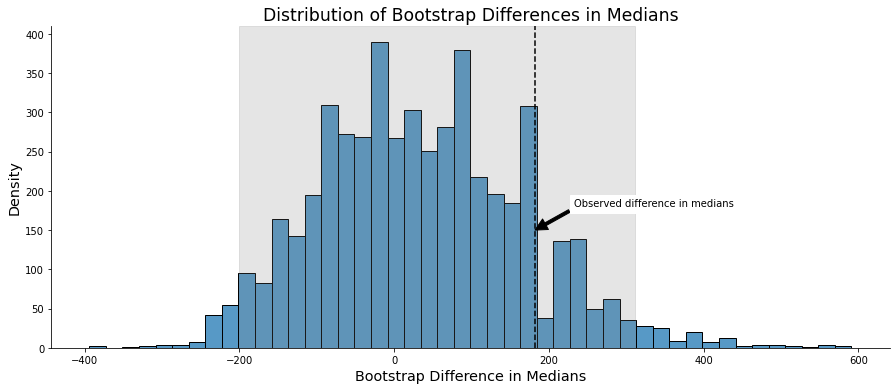

In [16]:
#Run "bs_replicates" on shifted guess data
reps_conf_shifted = np.array(bs_replicates(conf_shifted, np.median, n=5000))
reps_notconf_shifted = np.array(bs_replicates(notconf_shifted, np.median, n=5000))

#Calculate bootstrap differences in medians
reps = reps_conf_shifted - reps_notconf_shifted

#Compute 95% confidence interval of bootstrap differences in medians
lower, upper = np.percentile(reps, [2.5, 97.5])

#Plot bootstrap difference in means in a histogram
sns.displot(reps, kind = 'hist', height = 5, aspect = 2.5)

#Label axes
plt.xlabel('Bootstrap Difference in Medians', fontsize = 'x-large')
plt.ylabel('Density', fontsize = 'x-large')

#Label title
plt.title('Distribution of Bootstrap Differences in Medians', fontsize = 'xx-large')

#Mark 95% confidence interval in gray
plt.axvspan(lower, upper, color='grey', alpha=0.2)

#Add dashed line for observed difference in medians, with annotation and arrow
plt.axvline(x = observed_diff_medians, linestyle = '--', color = 'black')
plt.annotate('Observed difference in medians', xy=(observed_diff_medians, 150), xytext=(observed_diff_medians + 50, 180), 
             arrowprops={'facecolor':'black', 'width': 3}, backgroundcolor = 'white')
plt.show()

We see a much tighter confidence interval for the difference in medians, though the observed difference in medians still falls within this confidence interval. Thus, we would expect the p value to be greater than 0.05, making us unable to reject the null hypothesis. The distribution also appears to be slightly asymmetrical, so to be safe we use the equal-tail bootstrap p-value.

In [17]:
#Compute and print p-value
p = 2 * np.minimum(np.sum(reps <= observed_diff_medians)/len(reps), np.sum(reps > observed_diff_medians)/len(reps))
print('p-value =', p)

p-value = 0.2356


As predicted, the p-value of 0.24 is greater than 0.05, so we cannot reject the null hypothesis that $m_{MC} = m_{LC}$.

### 2(c). Discussion

Unlike with the overall mean and median, the two tests here do not tell drastically different stories. In both cases, we are unable to reject the null hypothesis that there is no difference between more confident and less confident guessers. Of course, this doesn't necessarily mean that there is in fact no difference between the groups. It is possible that there is a small difference and we didn't have a large enough or representative enough sample to detect it. It is also possible that we did not group people together correctly. For example, a large number of people might have selected 3 out of 5 on the survey because it was the default and they were just unsure which level to pick and were in fact less confident. The confidence question might have yielded more accurate results if respondents were simply given two options, "more confident" and "less confident".

However, it is also not surprising that there would be little, if any, difference between more confident and less confident guessers. It is reasonable to think that there are not many people out in the population who are in fact experts at estimating the number of jelly beans in a jar. If that is true, then a person's subjective confidence level might not say very much about their actual ability to estimate the correct number of jelly beans. It is interesting to note that in the Planet Money cow experiment, the guessers who claimed to be experts actually did worse than the overall crowd, but close enough that the difference could have been negligible [3]. It would be interesting to do this experiment again with a larger sample size and more refined survey questions.

# IV. Conclusion

This project looked at two questions in order to better understand the wisdom of crowds:

1. How well does the mean or median of a crowd's guesses estimate the number of jelly beans in a glass vase?
2. Do people who are more confident in their guesses estimate the number of jelly beans differently than people who are less confident?

Bootstrap hypothesis tests were performed at a significance level of $α = 5\%$ on both the means and medians of data collected from a survey on Reddit and Facebook asking respondents to guess how many jelly beans were in a glass vase and how confident they were in their answers. Testing the equality of the overall mean guess (1538) and the actual number of jelly beans (1534) yielded a p-value of 0.87, failing to reject the null hypothesis that the mean was equal to 1534. However, testing the equality of the overall median guess (750) and the actual number of jelly beans yielded a p-value of 0, thus rejecting the null hypothesis that the median was equal to 1534. This large difference in results was likely due to the influence of extreme outlier guesses on the mean. When testing the equality of the mean estimates from more confident and less confident guessers, the p-value was 0.58, failing to reject the null hypothesis that the means were the same. Similarly, testing the equality of the median estimates from more confident and less confident guessers, the p-value was 0.24, failing to reject the null hypothesis that the medians were the same.

The sample for this project was far from ideal for testing how the overall population would actually perform this estimation task, so it could likely be improved with a larger, more diverse sample. However, the overall lognormal distribution of estimates and underestimation of the actual number of jelly beans by the median guess conform with prior research on similar estimation tasks [1,6-8]. If we choose to trust the results of this project, then they indicate that individuals could improve their own performance on similar estimation tasks through an awareness of biases that cause them to guess incorrectly. Since most people underestimated the actual number of jelly beans, most people could improve their performance by bumping their estimates higher than they would normally think they need to be. The results also indicate that we could glean more wisdom from crowds depending on the ways that we measure their collective wisdom. In this experiment, the median turned out to be a poor source of wisdom, but the mean was much better. In their study of estimation bias and social influence on the wisdom of crwods, Kao et al. found that several "corrected" aggregation measures that took individual estimation biases into account generally outperformed other more traditional aggregation measures for sufficiently large sample sizes [1]. Thus, the wisdom of crowds might still be there in many cases, but just a bit harder to find.

# V. References

1. Kao AB, Berdahl AM, Hartnett AT, Lutz MJ, Bak-Coleman JB, Ioannou CC, Giam X, Couzin ID. 2018 Counteracting estimation bias and social influence to improve the wisdom of crowds. J. R. Soc. Interface 15: 20180130. http://dx.doi.org/10.1098/rsif.2018.0130.
2. Yong E. January 31, 2013, 'The Real Wisdom of the Crowds'. National Geographic. https://www.nationalgeographic.com/science/article/the-real-wisdom-of-the-crowds.
3. April 17, 2019, 'How Much Does This Cow Weight?' Planet Money. https://www.npr.org/transcripts/714289051.
4. Easley D, Kleinberg J. Networks, Crowds, and Markets: Reasoning about a Highly Connected World. Cambridge University Press (2010). https://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch16.pdf
5. Jeans J (1968/1937). Science & Music. Dover Publications.
6. Izard V, Dehaene S. 2008 'Calibrating the mental number line'. Cognition 106, 1221–1247. https://www.unicog.org/publications/IzardDehaene_NumerosityNamingCalibration_Cognition2007.pdf.
7. Krueger LE. 1982 'Single judgments of numerosity'. Atten. Percept. Psychophys. 31, 175–182. https://link.springer.com/content/pdf/10.3758/BF03206218.pdf.
8. Krueger LE. 1984 'Perceived numerosity: a comparison of magnitude production, magnitude estimation, and discrimination judgments'. Atten. Percept. Psychophys. 35, 536–542.https://link.springer.com/content/pdf/10.3758/BF03205949.pdf.
9. MacKinnon JG. 2007 'Bootstrap Hypothesis Testing'. Queen’s Economics Department Working Paper No. 1127. https://ageconsearch.umn.edu/record/273603/files/qed_wp_1127.pdf.
10. Forst J. 'Introduction to Bootstrapping in Statistics with an Example'. Statistics By Jim. https://statisticsbyjim.com/hypothesis-testing/bootstrapping/.
11. Giannoulis C. 'How to Interpret the Width of a Confidence Interval'. The Analysis Factor. https://www.theanalysisfactor.com/interpret-width-of-confidence-interval/.